<a href="https://colab.research.google.com/github/JunwenFang/1015-Text-as-Data/blob/main/%E2%80%9CRecitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recitation 0, 01/30/25

- Text As Data Spring 2025
- TAs: Dias Akhmetbekov, Sarthak Khandelwal

## Introductory Lab: Text as Data

Welcome to the first lab session of the 'Text as Data' course! In this session, we will explore the basics of Google Colab and perform some hands-on text analysis.


### Notebook Navigation
- Cells (code vs. markdown)
- Keyboard shortcuts:
  - Cell Execution
    - `Shift + Enter`: Run the current cell and move to the next one
    - `CMD + Enter`: Run the current cell and stay in the same cell
  - Cell Manipulation
    - `CMD + M A`: Insert a new cell above the current one
    - `CMD + M B`: Insert a new cell below the current one
    - `CMD + M D`: Delete the current cell
 - Cell Type Conversion
    - `CMD + M M`: Convert the current cell to a Markdown cell
    - `CMD + M Y`: Convert the current cell to a code cell
- Runtime types (CPU/GPU).

### Python Refresher
- Practice basic syntax, variables, and data types (strings, lists) using Colab's pre-installed libraries.

#### Exercise
Run the following Python script to print a greeting and perform string concatenation:


In [1]:
# Python Refresher
name = input('Enter your name: ')
print(f'Hello, {name}! Welcome to the Text as Data course.')

# String concatenation example
part1 = 'Text as'
part2 = ' Data'
print(part1 + part2)

Enter your name: frank
Hello, frank! Welcome to the Text as Data course.
Text as Data


## GPU Runtime
Google colab also comes with a free GPU runtime with restricted usage levels.
It is good for small workloads.

In [2]:
import torch
# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Get the number of CUDA devices
print("Number of CUDA devices:", torch.cuda.device_count())

# Get the current CUDA device
print("Current CUDA device:", torch.cuda.current_device())

# Get the CUDA device object
device = torch.cuda.device(0)
print("CUDA device object:", device)

# Get the name of the CUDA device
print("CUDA device name:", torch.cuda.get_device_name(0))

CUDA available: False
Number of CUDA devices: 0


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Basic Operations
- Perform operations like lowercasing, removing punctuation/numbers, tokenization, and word counting.

#### Exercise
Clean the following sample text and generate word frequency stats:


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Sample text
text = 'Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do.'

# Clean the text
import string
cleaned_text = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
print(cleaned_text)
# Word frequency
from collections import Counter
word_freq = Counter(cleaned_text)
print(f'Word count: {len(cleaned_text)}')
print('Word frequencies:', word_freq)

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do']
Word count: 21
Word frequencies: Counter({'to': 2, 'of': 2, 'alice': 1, 'was': 1, 'beginning': 1, 'get': 1, 'very': 1, 'tired': 1, 'sitting': 1, 'by': 1, 'her': 1, 'sister': 1, 'on': 1, 'the': 1, 'bank': 1, 'and': 1, 'having': 1, 'nothing': 1, 'do': 1})


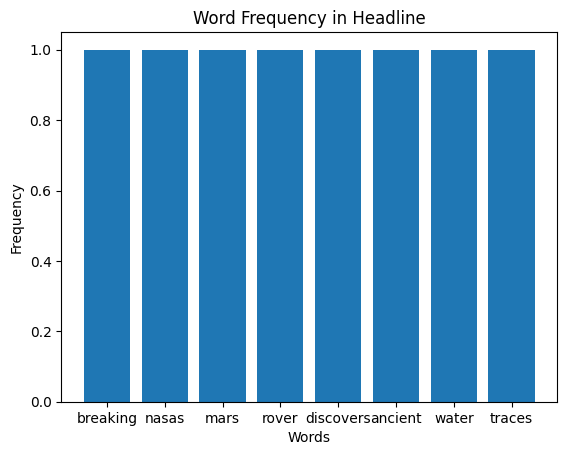

In [ ]:
# Example headline
headline = "Breaking: NASA's Mars rover discovers ancient water traces!"

# Clean the text
cleaned_headline = headline.lower().translate(str.maketrans('', '', string.punctuation)).split()

# Word frequency
word_freq = Counter(cleaned_headline)

# Visualization
import matplotlib.pyplot as plt
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequency in Headline')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Using Pip


In [ ]:
pip install nltk

# File I/O In Colab

## Using files from Google drive

You can access files in Drive in a number of ways, including:

 - Mounting your Google Drive in the runtime's virtual machine
 - Using a wrapper around the API such as PyDrive2
 - Using the native REST API

Top 5 most common words:
free: 3
cloud: 2
gpu: 2
use: 2
google: 1


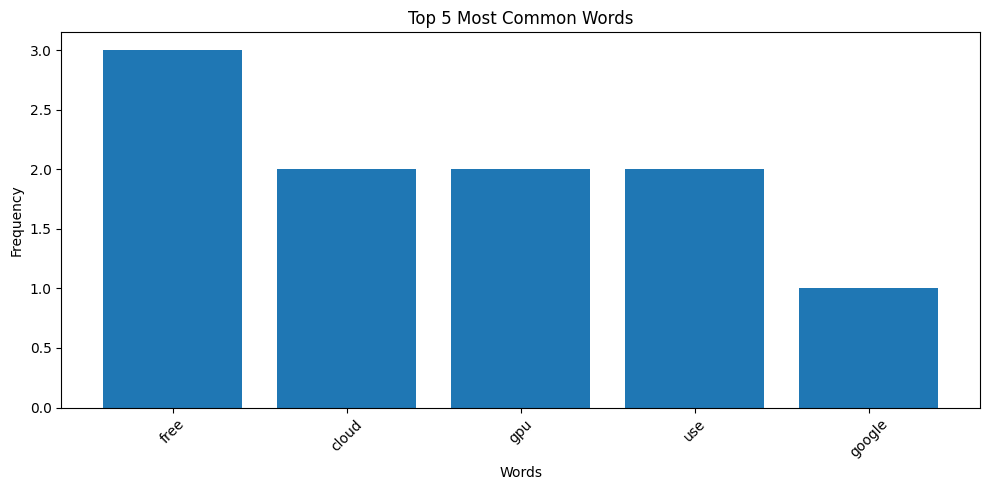

In [ ]:
"""
Google Colab is a free cloud service and now it includes free GPU!
You can; import dataset, change runtime, use free GPU and save to GitHub.
It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.
"""

import re
from collections import Counter
import matplotlib.pyplot as plt

# Loading a file from google drive
with open("./drive/MyDrive/data.txt", "r") as file:
  text = file.read()

# Remove common words (a very basic stopword list)
def remove_stopwords(words):
    stopwords = set(['the', 'a', 'an', 'in', 'to', 'and', 'is', 'it', 'that', 'of'])
    return [word for word in words if word not in stopwords]

# Clean and process the text
words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
filtered_words = remove_stopwords(words)

# 1. Word frequency analysis
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(5)

print("Top 5 most common words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# 2. Visualize word frequency
plt.figure(figsize=(10, 5))
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.title("Top 5 Most Common Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.txt to data.txt
User uploaded file "data.txt" with length 240 bytes


### Downloading files to your local file system
`files.download` will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files

with open('data1.txt', 'w') as f:
  f.write('New lines from Colab')

files.download('data1.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exercise

Create a plot of the top 5 words in the following piece of text (generated by Perplexity) and download the plot for the same.

```
The Golden Gate Bridge, an iconic symbol of San Francisco, stands as a testament to human engineering and architectural beauty. Spanning the Golden Gate strait, this Art Deco masterpiece has captivated visitors since its completion in 1937. Its distinctive International Orange color, chosen to complement the natural surroundings and enhance visibility in fog, has become synonymous with the city's identity. The bridge's 746-foot-tall towers and sweeping main cables not only serve a functional purpose but also create a visually striking silhouette against the Bay Area's often misty skyline. Despite its massive scale, the Golden Gate Bridge maintains an air of elegance, drawing millions of tourists each year who come to walk, bike, or simply gaze in awe at this marvel of 20th-century innovation.
```

- Remove puntuations
- Separate words
- Count frequency of different words
- Create a plot
- Download the plot

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import files

# Text about the Golden Gate Bridge generated by Perplexity
text = """
The Golden Gate Bridge, an iconic symbol of San Francisco, stands as a testament to human engineering and architectural beauty. Spanning the Golden Gate strait,
this Art Deco masterpiece has captivated visitors since its completion in 1937. Its distinctive International Orange color, chosen to complement the natural surroundings
and enhance visibility in fog, has become synonymous with the city's identity. The bridge's 746-foot-tall towers and sweeping main cables not only serve a functional
purpose but also create a visually striking silhouette against the Bay Area's often misty skyline. Despite its massive scale, the Golden Gate Bridge maintains an air of
elegance, drawing millions of tourists each year who come to walk, bike, or simply gaze in awe at this marvel of 20th-century innovation.
"""

def remove_punctuations(text):
    # Your code here
    pass

def separate_words(text):
    # Your code here
    pass

def count_word_frequency(words):
    # Your code here
    pass

def plot_top_words(word_freq):
    # Your code here
    pass

def download_plot():
    # Your code here
    pass

# Main execution
cleaned_text = remove_punctuations(text)
words = separate_words(cleaned_text)
word_freq = count_word_frequency(words)
plot_top_words(word_freq)
download_plot()

print("Exercise completed!")


IndentationError: expected an indented block after function definition on line 15 (<ipython-input-14-70c20881ade9>, line 18)